In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('cleaned_data/gurgaon_properties_outlier_treated.csv',index_col='Unnamed: 0')

In [10]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,pareena laxmi apartments,sector 99a,0.30,5425.0,553.0,Super Built up area 553(51.38 sq.m.)Carpet are...,2.0,1.0,2,5.0,North,New Property,553.0,NaN,470.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,276.5
1,house,independent,sector 48,5.50,23504.0,2340.0,Plot area 260(217.39 sq.m.),4.0,4.0,2,2.0,North,Relatively New,NaN,2340.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,22.0,585.0
2,flat,green court,sector 90,0.47,6812.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,0.0,East,New Property,NaN,NaN,690.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,345.0
4,flat,signature global city 92,sector 92,0.78,11143.0,700.0,Super Built up area 1010(93.83 sq.m.)Carpet ar...,2.0,2.0,3,2.0,NaN,Under Construction,1010.0,NaN,700.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,350.0
5,flat,tulip lemon,sector 69,0.62,12863.0,482.0,Carpet area: 482 (44.78 sq.m.),2.0,2.0,1,4.0,North-East,Relatively New,NaN,NaN,482.0,0.0,0.0,0.0,0.0,0.0,1.0,108.0,241.0


In [8]:
df.shape

(3689, 24)

In [11]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1074
agePossession             0
super_built_up_area    1774
built_up_area          2052
carpet_area            1772
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

## Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

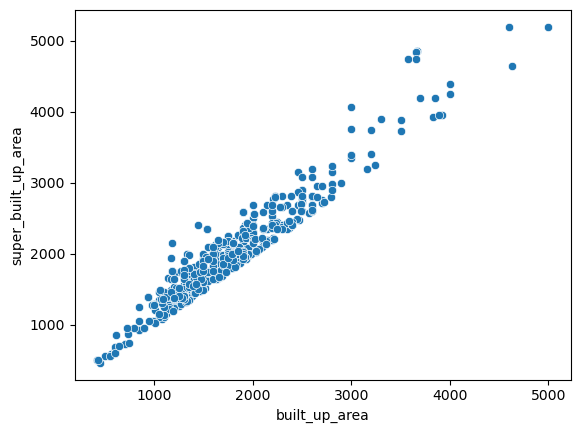

In [13]:
sns.scatterplot(x = df['built_up_area'],y = df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

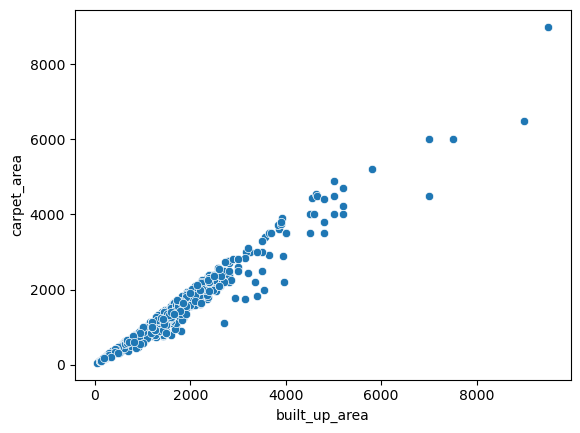

In [14]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [18]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
4       False
5       False
        ...  
3808    False
3809    False
3810    False
3811    False
3812    False
Length: 3689, dtype: bool

In [22]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [23]:
all_present_df.shape

(534, 24)

In [24]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [25]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [26]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1048701298701298 0.900140056022409


In [31]:
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [32]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,pareena laxmi apartments,sector 99a,0.30,5425.0,553.0,Super Built up area 553(51.38 sq.m.)Carpet are...,2.0,1.0,2,5.0,North,New Property,553.0,NaN,470.00,0.0,0.0,0.0,0.0,0.0,0.0,66.0,276.500000
4,flat,signature global city 92,sector 92,0.78,11143.0,700.0,Super Built up area 1010(93.83 sq.m.)Carpet ar...,2.0,2.0,3,2.0,NaN,Under Construction,1010.0,NaN,700.00,0.0,0.0,0.0,0.0,1.0,0.0,24.0,350.000000
13,flat,mapsko mount ville,sector 79,1.30,8025.0,1620.0,Super Built up area 1620(150.5 sq.m.)Carpet ar...,3.0,3.0,3+,1.0,North-East,Relatively New,1620.0,NaN,863.91,0.0,0.0,0.0,0.0,0.0,1.0,140.0,540.000000
21,flat,shapoorji pallonji joyville gurugram,sector 102,2.12,11447.0,1852.0,Super Built up area 1852(172.06 sq.m.)Carpet a...,3.0,3.0,3,9.0,South-East,New Property,1852.0,NaN,1320.00,0.0,0.0,0.0,0.0,0.0,0.0,109.0,617.333333
23,flat,supertech araville,sector 79,0.71,6063.0,1171.0,Super Built up area 1295(120.31 sq.m.)Carpet a...,2.0,2.0,3+,17.0,North,New Property,1295.0,NaN,1250.00,0.0,0.0,0.0,0.0,1.0,0.0,53.0,585.500000


In [33]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\ogeti\AppData\Local\Temp\ipykernel_34028\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [34]:
df.update(sbc_df)

In [35]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1074
agePossession             0
super_built_up_area    1774
built_up_area          1624
carpet_area            1772
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [37]:
# super_built_up_area present and carpet and built up area is null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [38]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
8,flat,antriksh heights,sector 84,1.05,5012.0,2095.0,Super Built up area 2095(194.63 sq.m.),4.0,4.0,3+,3.0,North,New Property,2095.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,66.0,523.750000
9,flat,maruti vihar,sector 28,1.00,9091.0,1100.0,Super Built up area 1100(102.19 sq.m.),1.0,1.0,1,1.0,North,Old Property,1100.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,1.0,80.0,1100.000000
12,flat,sare crescent parc,sector 92,0.50,5000.0,1000.0,Super Built up area 1000(92.9 sq.m.),2.0,2.0,3,2.0,NaN,Moderately Old,1000.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,38.0,500.000000
15,flat,vatika seven elements,sector 89,1.60,8163.0,1960.0,Super Built up area 1960(182.09 sq.m.),3.0,3.0,3,5.0,NaN,New Property,1960.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,58.0,653.333333
16,flat,tulip violet,sector 69,1.55,9823.0,1578.0,Super Built up area 1578(146.6 sq.m.),3.0,3.0,2,9.0,North-East,Relatively New,1578.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,165.0,526.000000


In [39]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True) 

C:\Users\ogeti\AppData\Local\Temp\ipykernel_34028\12434996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [40]:
df.update(sb_df)

In [41]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1074
agePossession             0
super_built_up_area    1774
built_up_area           721
carpet_area            1772
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [42]:
# carpet area is present and super built up and carpet area is null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [43]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,flat,green court,sector 90,0.47,6812.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,0.0,East,New Property,NaN,NaN,690.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,345.000000
5,flat,tulip lemon,sector 69,0.62,12863.0,482.0,Carpet area: 482 (44.78 sq.m.),2.0,2.0,1,4.0,North-East,Relatively New,NaN,NaN,482.0,0.0,0.0,0.0,0.0,0.0,1.0,108.0,241.000000
6,flat,m3m skycity,sector 65,1.80,13699.0,1314.0,Carpet area: 1310 (121.7 sq.m.),2.0,2.0,3,13.0,NaN,New Property,NaN,NaN,1310.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,657.000000
19,flat,umang winter hills,sector 77,1.00,7502.0,1333.0,Carpet area: 1340 (124.49 sq.m.),2.0,2.0,2,3.0,NaN,New Property,NaN,NaN,1340.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,666.500000
29,flat,signature global park,sohna road,0.91,6289.0,1447.0,Carpet area: 1439 (133.69 sq.m.),3.0,3.0,3,1.0,West,Relatively New,NaN,NaN,1439.0,0.0,0.0,0.0,1.0,0.0,0.0,165.0,482.333333


In [44]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\ogeti\AppData\Local\Temp\ipykernel_34028\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [45]:
df.update(c_df)

In [46]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1074
agePossession             0
super_built_up_area    1774
built_up_area             0
carpet_area            1772
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

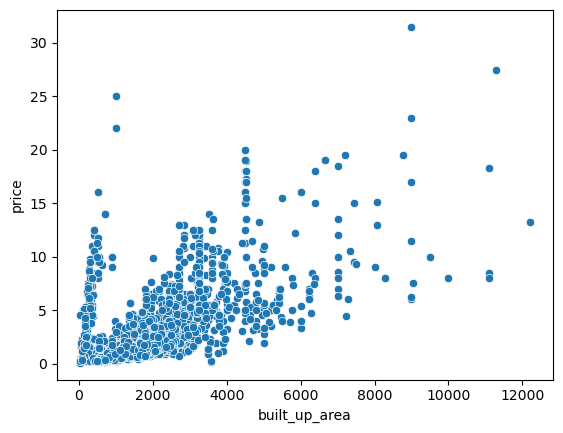

In [48]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [50]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [51]:
anamoly_df.sample(5)

,price,area,built_up_area
851,2.99,2000.0,1800.0
3293,2.99,1449.0,1449.0
3449,4.20,2125.0,1946.0
1960,4.75,2367.0,261.0
1964,3.75,1620.0,333.0


In [52]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [53]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

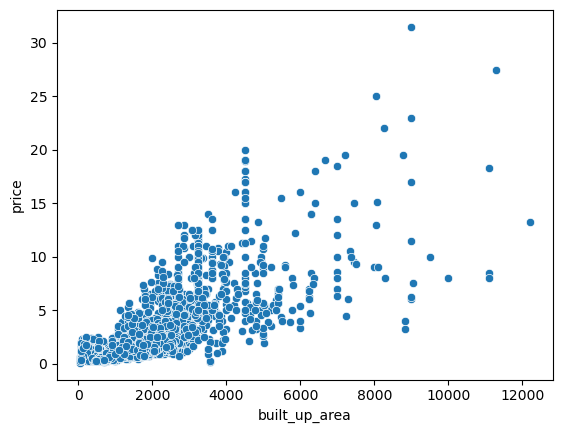

In [54]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [55]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,pareena laxmi apartments,sector 99a,0.30,5425.0,553.0,Super Built up area 553(51.38 sq.m.)Carpet are...,2.0,1.0,2,5.0,North,New Property,553.0,511.0,470.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,276.5
1,house,independent,sector 48,5.50,23504.0,2340.0,Plot area 260(217.39 sq.m.),4.0,4.0,2,2.0,North,Relatively New,NaN,2340.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,22.0,585.0
2,flat,green court,sector 90,0.47,6812.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,0.0,East,New Property,NaN,767.0,690.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,345.0
4,flat,signature global city 92,sector 92,0.78,11143.0,700.0,Super Built up area 1010(93.83 sq.m.)Carpet ar...,2.0,2.0,3,2.0,NaN,Under Construction,1010.0,846.0,700.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,350.0
5,flat,tulip lemon,sector 69,0.62,12863.0,482.0,Carpet area: 482 (44.78 sq.m.),2.0,2.0,1,4.0,North-East,Relatively New,NaN,536.0,482.0,0.0,0.0,0.0,0.0,0.0,1.0,108.0,241.0


In [56]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [57]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,pareena laxmi apartments,sector 99a,0.30,5425.0,2.0,1.0,2,5.0,North,New Property,511.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
1,house,independent,sector 48,5.50,23504.0,4.0,4.0,2,2.0,North,Relatively New,2340.0,0.0,1.0,0.0,0.0,0.0,1.0,22.0
2,flat,green court,sector 90,0.47,6812.0,2.0,2.0,1,0.0,East,New Property,767.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
4,flat,signature global city 92,sector 92,0.78,11143.0,2.0,2.0,3,2.0,NaN,Under Construction,846.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0
5,flat,tulip lemon,sector 69,0.62,12863.0,2.0,2.0,1,4.0,North-East,Relatively New,536.0,0.0,0.0,0.0,0.0,0.0,1.0,108.0


In [58]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1074
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## floorNum

In [59]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
320,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
455,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0
526,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
755,flat,experion heartsong,dwarka expressway gurgaon,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1758.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
993,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0.0,1.0,0.0,1.0,0.0,1.0,130.0
1009,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,0.0,1.0,0.0,0.0,0.0,0.0,59.0
1856,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
2091,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2135,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0


In [60]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [61]:
df['floorNum'].fillna(2.0,inplace=True)

In [62]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1074
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## facing

<Axes: ylabel='facing'>

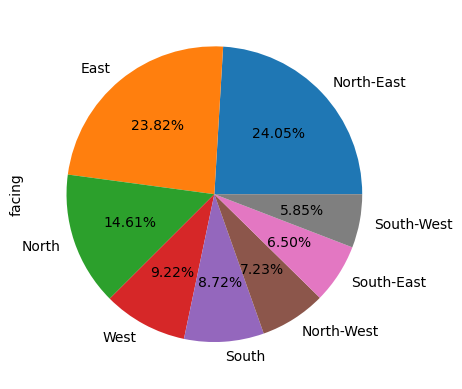

In [63]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [64]:
df.drop(columns=['facing'],inplace=True)

In [65]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [66]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2627,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
df.drop(index=[2627],inplace=True)

In [68]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

## agePossession

In [69]:
df['agePossession'].value_counts()

Relatively New        1633
New Property           592
Moderately Old         558
Undefined              321
Old Property           304
Under Construction     280
Name: agePossession, dtype: int64

In [70]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
14,flat,godrej habitat,sector 3,1.35,12784.0,2.0,2.0,0,4.0,Undefined,1056.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
50,flat,ashiana anmol,sohna road,0.90,7059.0,2.0,2.0,2,8.0,Undefined,1275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,flat,signature global park,sohna road,0.87,7190.0,3.0,2.0,3,4.0,Undefined,1210.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0
100,flat,ramsons kshitij,sector 95,0.40,5839.0,3.0,2.0,2,6.0,Undefined,761.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,flat,essel towers,mehrauli gurgaon road,2.20,12500.0,3.0,4.0,3+,3.0,Undefined,1956.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,flat,signature global park,sohna road,0.58,7056.0,2.0,2.0,2,3.0,Undefined,822.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0
3777,flat,eldeco accolade,sector 33,1.20,8043.0,2.0,2.0,2,0.0,Undefined,1492.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
3781,house,independent,sector 38,8.00,25616.0,10.0,10.0,3+,1.0,Undefined,3123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3802,house,independent,sector 12,1.70,9444.0,3.0,3.0,0,1.0,Undefined,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [72]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [73]:
df['agePossession'].value_counts()

Relatively New        1761
New Property           635
Moderately Old         598
Old Property           339
Under Construction     297
Undefined               58
Name: agePossession, dtype: int64

In [74]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [75]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [76]:
df['agePossession'].value_counts()

Relatively New        1770
New Property           636
Moderately Old         606
Old Property           339
Under Construction     297
Undefined               40
Name: agePossession, dtype: int64

In [77]:

def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [78]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [79]:
df['agePossession'].value_counts()

Relatively New        1779
Moderately Old         637
New Property           636
Old Property           339
Under Construction     297
Name: agePossession, dtype: int64